In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

In [100]:
%run DMD_functions.ipynb 

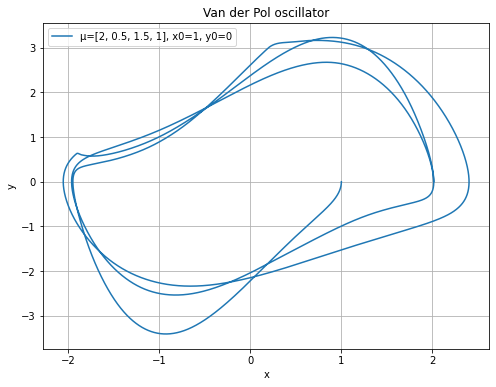

In [101]:
#Van der Pol oscillator system
initial_condition = (1,0)
mu = [2, 0.5, 1.5, 1]
t_span=(0,20-1e-5)
t_eval = np.linspace(t_span[0], t_span[1]-1e-5, 2000000)


def van_der_pol(t, state, mu):
    x, y = state
    dxdt = y
    mu_u = mu[int(t//5)]
    dydt = mu_u * (1 - x**2) * y - x
    return [dxdt, dydt]

"""solution= solve_ivp(van_der_pol, t_span, [initial_condition[0], initial_condition[1]], args=(mu[0],), t_eval=t_eval[500000*i:500000*(i+1)], vectorized=True)
solution=solution.y
for i in range(1, 4):
    sol=solve_ivp(van_der_pol, t_span, [solution[0,-1], solution[1,-1]], args=(mu[i],), t_eval=t_eval[500000*i:500000*(i+1)], vectorized=True)
    solution=np.concatenate((solution, sol.y), axis=1)"""
sol = solve_ivp(van_der_pol, t_span, [initial_condition[0], initial_condition[1]], args=(mu,), t_eval=t_eval, vectorized=True) #u sol.y[0] i sol.y[1] su (x,y) koordinate točke za svaki trenutak

#print(sol.y[0].shape, sol.y[1].shape)
#print(sol.t.shape)

plt.figure(figsize=(8,6))
plt.plot(sol.y[0], sol.y[1], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()



(2, 2000)


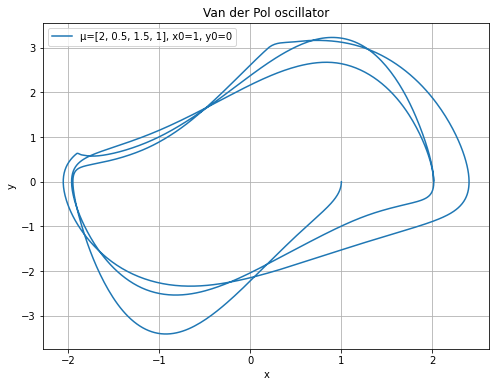

In [102]:
t_used=np.arange(0,2000000,1000)
del (t_eval)
vdp = sol.y[:,t_used]
print(vdp.shape)

plt.figure(figsize=(8, 6))
plt.plot(vdp[0,:], vdp[1,:], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

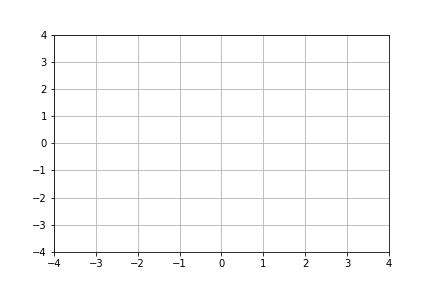

In [103]:
%matplotlib widget

fig, ax = plt.subplots()

line2 = ax.plot(vdp[0,0], vdp[1,0], lw=2)[0]
ax.set_xbound(-4,4); ax.set_ybound(-4,4)
plt.grid()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[0,:frame]
    y = vdp[1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    return (line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=vdp.shape[1], interval=50, blit=True, repeat=False)
plt.show()

In [104]:
%matplotlib inline

Ako ih ne "stackam" uvijek ću dobiti max dva moda (nakon svd-a,...)

In [105]:

num_stack = 60
m=vdp.shape[1]
vdp_end=vdp[:,-num_stack:]
vdp = vdp[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    added=np.concatenate((vdp[:2,i:], vdp_end[:2,:i]), axis=1)
    vdp=np.vstack((vdp,added))

In [106]:
#provjera jel dobro formirana matrica..

k=np.random.randint(num_stack, m-num_stack)
for i in range(1,num_stack):
    if(np.all(vdp[:2,k]==vdp[2*i:2*i+2,k-i])):
        print(True, end=" ")
    else:
        print(False, vdp[:2,k],vdp[2*i:2*i+2,k-i])

True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True 

In [107]:
m=vdp.shape[1]-1

Z, L = DMD(vdp[:,:m], vdp[:,1:(m+1)], tol=1e-6)
print(L.shape)

(119,)


In [108]:
Z, L, r, _, _ = GEDMDQ(vdp[:,:m+1], tol=1e-6)
print(L.shape)

(117,)


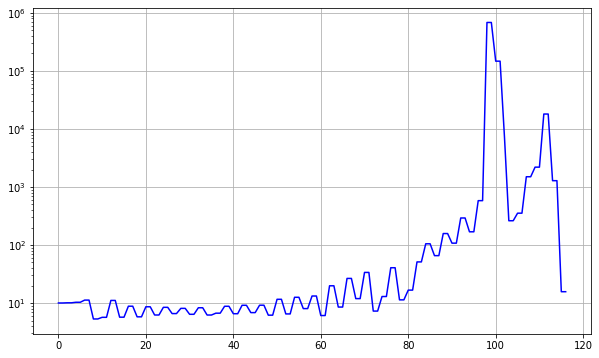

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(1/r, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [110]:
threshold = 1e-3
indices = np.where(r<threshold)[0]
print(indices, indices.shape)

[ 98  99 100 101 102 107 108 109 110 111 112 113 114] (13,)


In [111]:
times = [i for i in range(m-100,m+100)]

reconstructed = DMD_reconstruction(vdp[:,:1], Z, indices, L, times)


**uzimamo dio oscilatora - iz toga procjena za dalje**


.

In [112]:
poc=450; zav=550; rec=50

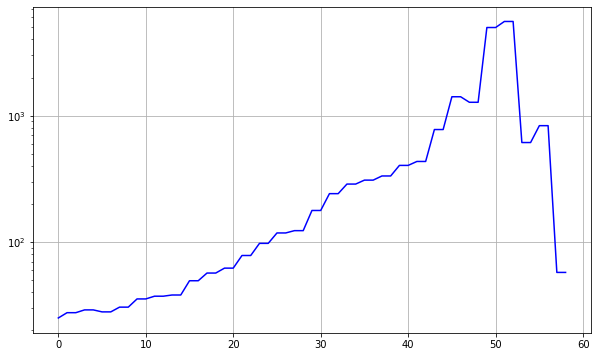

In [113]:
Z, L, r, _, _ = GEDMDQ(vdp[:,poc:zav], tol=1e-6)

plt.figure(figsize=(10, 6))
plt.plot(1/r, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [114]:
threshold=1e-3
indices=np.where(r<threshold)[0]
indices.shape

###threshold se mijenja ovisno o tome koliko ih stackam!! 

(8,)

In [115]:
reconstructed = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, [i for i in range(zav-poc+rec)])

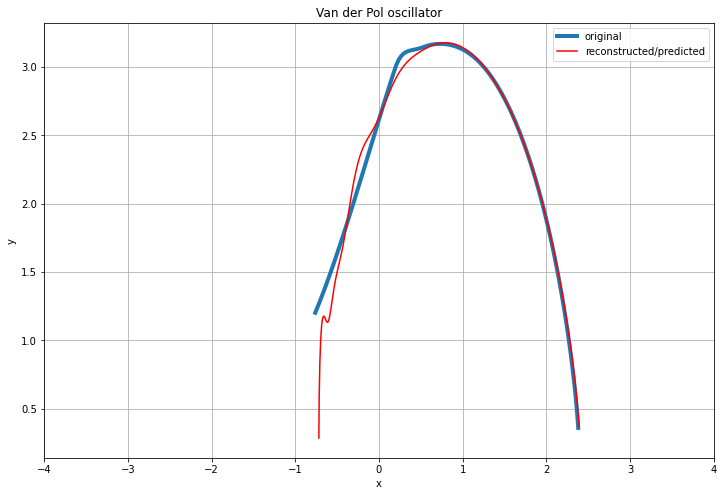

In [116]:
plt.figure(figsize=(12, 8))
plt.plot(vdp[0,poc:zav+rec], vdp[1,poc:zav+rec],lw=4, label=f"original")
plt.plot(reconstructed[0,:], reconstructed[1,:], label=f"reconstructed/predicted", color="red")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.xlim((-4,4))
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

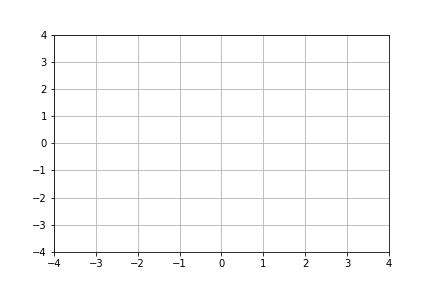

In [117]:
%matplotlib widget

fig, ax = plt.subplots()

line2 = ax.plot(vdp[0,poc], vdp[1,poc], lw=4, color="blue")[0]
line1 = ax.plot(reconstructed[0,0], reconstructed[1,0], lw=2, color="red")[0]
ax.set_xbound(-4,4); ax.set_ybound(-4,4)
plt.grid()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[0,poc:(poc+frame)]
    y = vdp[1,poc:(poc+frame)]
    x_r = reconstructed[0,:frame]
    y_r = reconstructed[1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    line1.set_xdata(x_r)
    line1.set_ydata(y_r)
    return (line2, line1)


ani = animation.FuncAnimation(fig=fig, func=update, frames=zav-poc+rec, interval=150, blit=True, repeat=False)
plt.show()

**adding and removing snapshots**


...

In [118]:
%matplotlib inline

(16,)
(64,)
(38,)
(36,)
(34,)
(45,)
(39,)
(36,)
(45,)
(43,)
(38,)
(36,)
(36,)
(39,)
(39,)
(39,)
(39,)
(36,)
(41,)
(39,)
(39,)
(39,)
(39,)
(39,)
(41,)
(41,)
(39,)
(39,)
(40,)
(38,)
(42,)
(42,)
(42,)
(42,)
(40,)
(42,)
(42,)
(44,)
(48,)


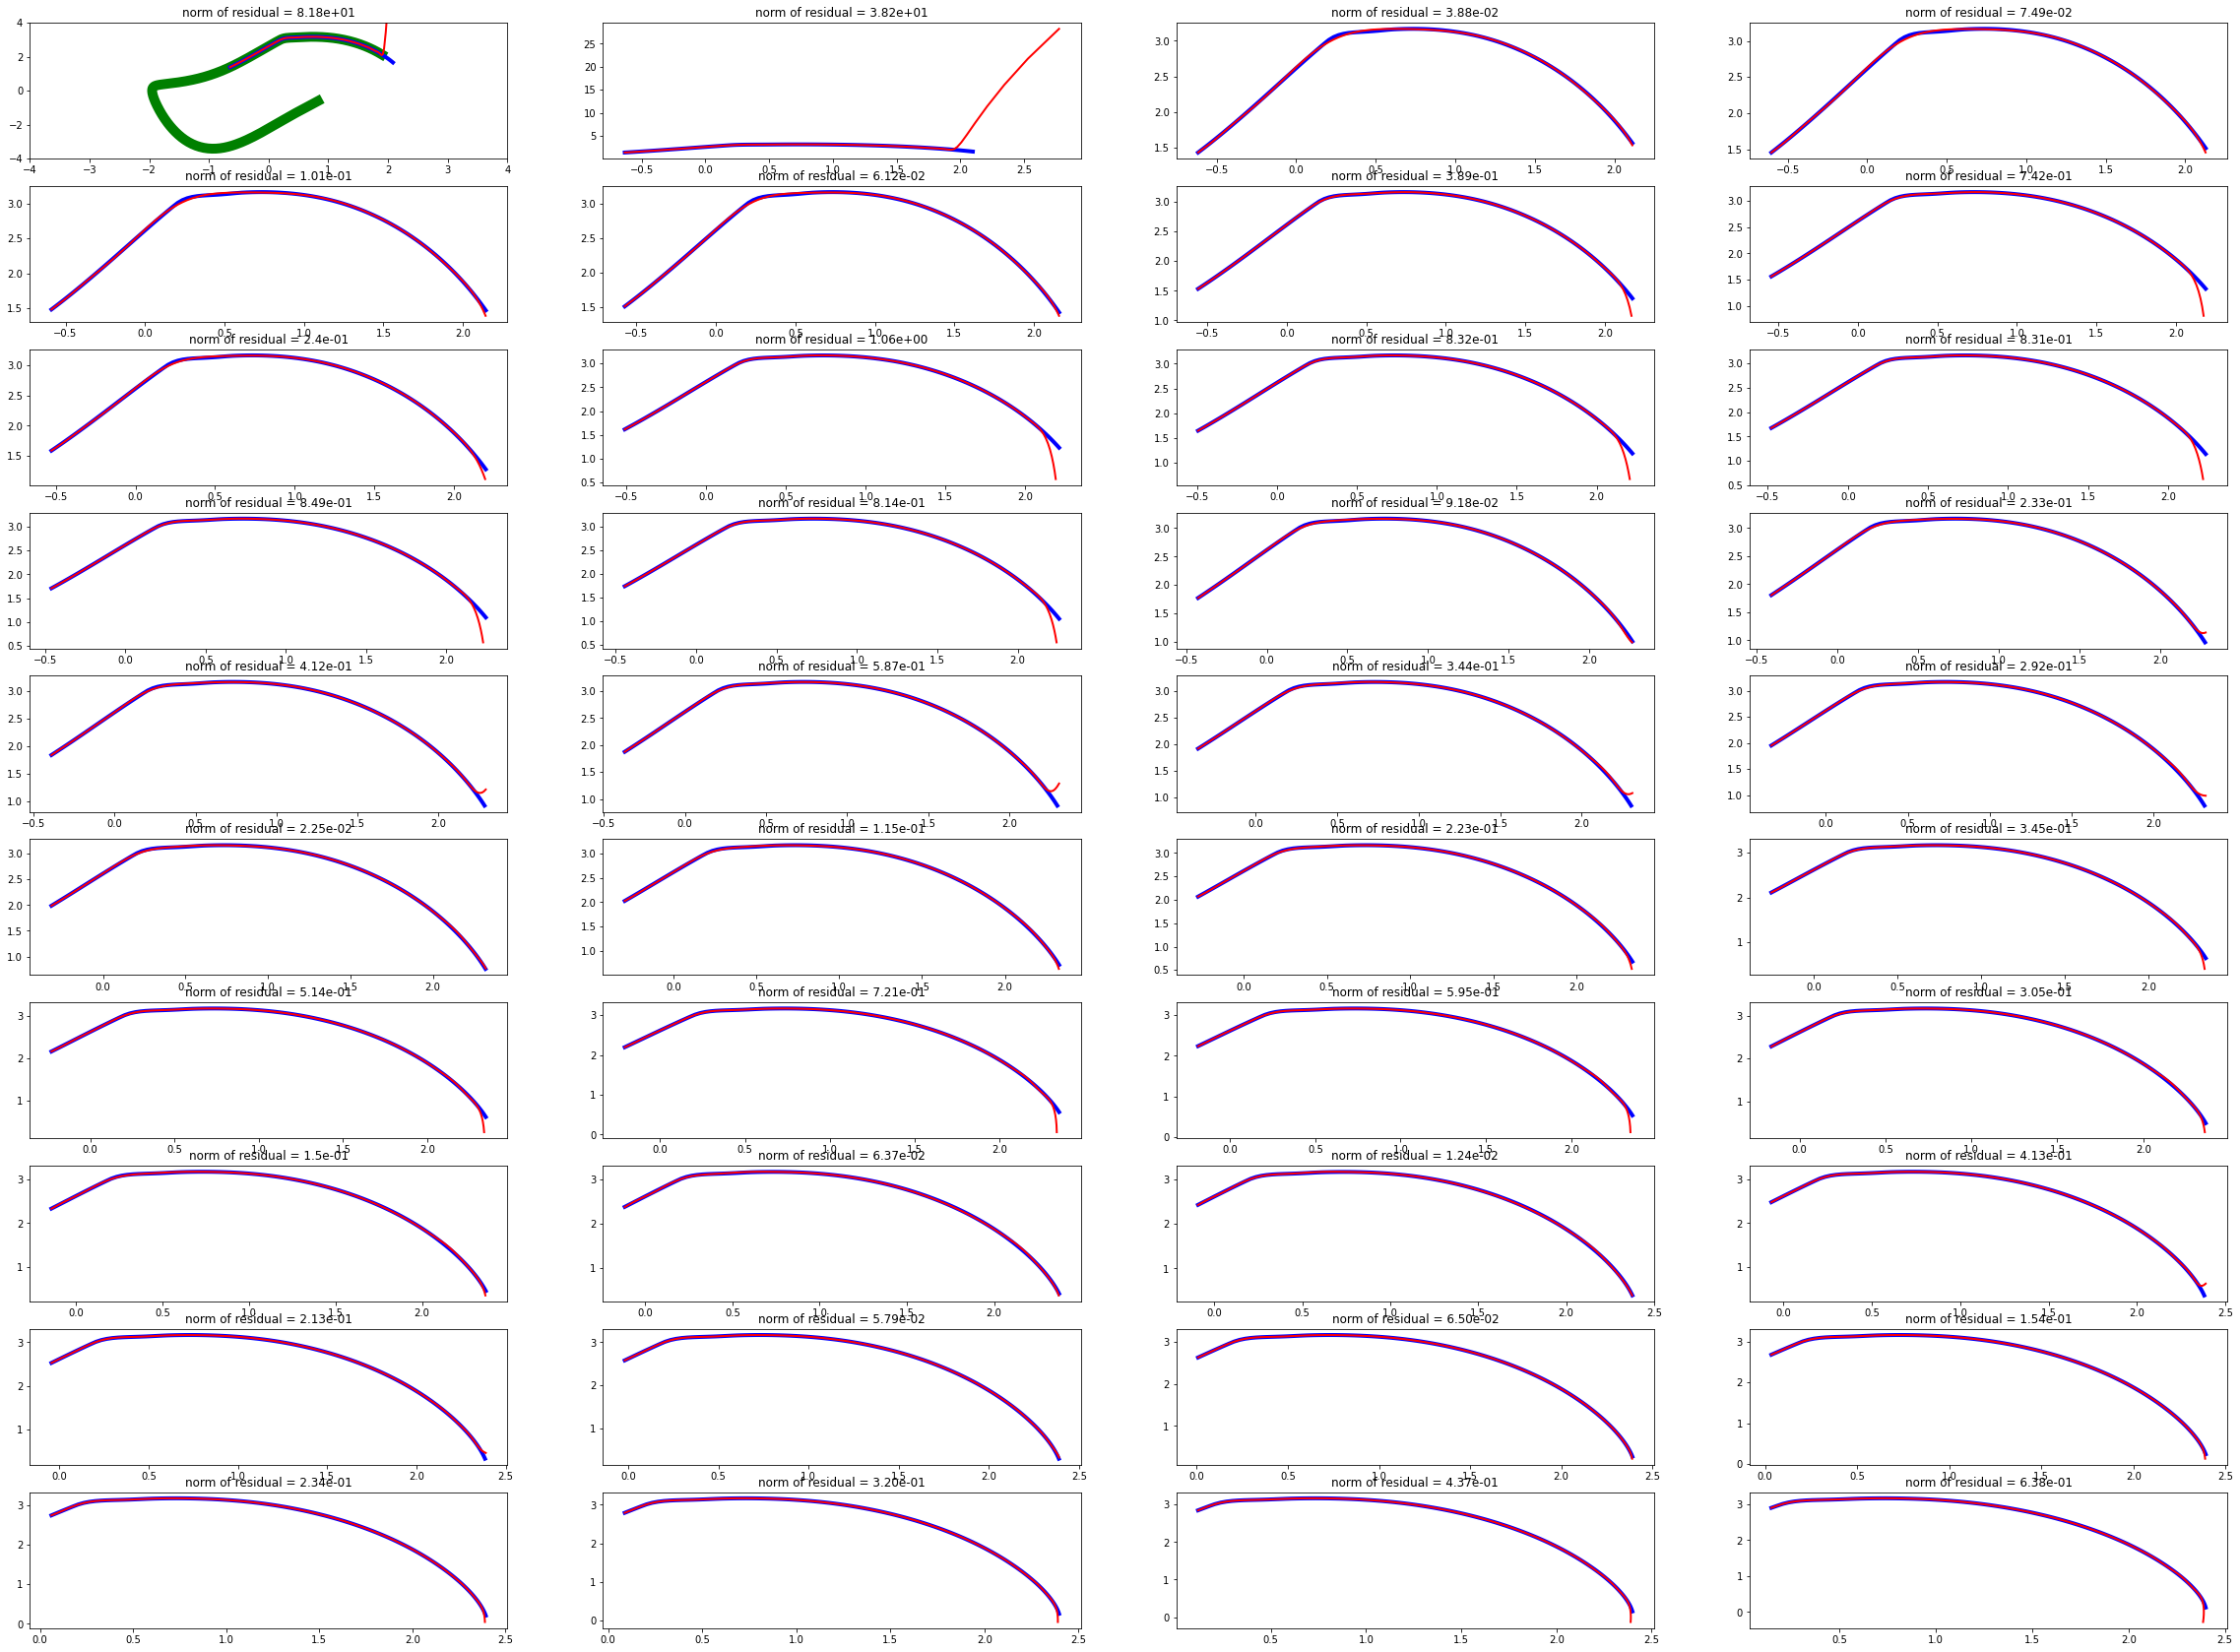

In [119]:
####################################################################################################################################
#           BEZ WEIGHTS
####################################################################################################################################


#dodajem 1
koliko_predvidam=10

poc=400; zav=500


koliko_x=10; koliko_y=4
fig, axs = plt.subplots(koliko_x, koliko_y, figsize=(40,30), squeeze=True)

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav], tol=1e-6)  ######################## Bilo je potrebno smanjiti tolerance (za odredivanje numerickog ranga) - sad vise nema ni linalg error u solve:)

threshold=1e-2
indices = np.where(r < threshold)[0]
times=[i for i in range(zav-poc+koliko_predvidam)]
predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)

axs[0,0].plot(vdp[-2, :zav], vdp[-1,:zav], color="green", lw=10) 
axs[0,0].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4)
axs[0,0].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
axs[0,0].set_xlim((-4,4)); axs[0,0].set_ylim((-4,4))
res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
axs[0,0].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))


br=0
for i in range(koliko_x):
    for j in range(koliko_y):
        if(i==0 and j==0):
            continue
        zav=zav+1
        #neki uvjet kada odbacujem - ako sam skratila window nema smisla odmah odbaciti
        if(zav-poc>60):
            poc=poc+1
            _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R, tol=1e-6)
        
        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, tol=1e-6)

        indices=np.where(r < threshold)[0]
        print(indices.shape)


        predicted = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
        
        axs[i,j].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4)
        axs[i,j].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
        res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
        axs[i,j].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))
        #threshold=1e-2
    #ako norma res < 1e-1 npr. odsječi sve osim zadnjih k
    # ovo jako lose radi... zasto...
        """if res > 0.5 and zav-poc>60:
            poc=zav-30
            threshold = 1e-1"""


(16,)
(64,)
(38,)
(36,)
(34,)
(45,)
(39,)
(36,)
(45,)
(43,)
(38,)
(36,)
(36,)
(39,)
(39,)
(39,)
(39,)
(36,)
(41,)
(39,)
(39,)
(39,)
(39,)
(39,)
(41,)
(41,)
(39,)
(39,)
(40,)
(38,)
(42,)
(42,)
(42,)
(42,)
(40,)
(42,)
(42,)
(44,)
(48,)


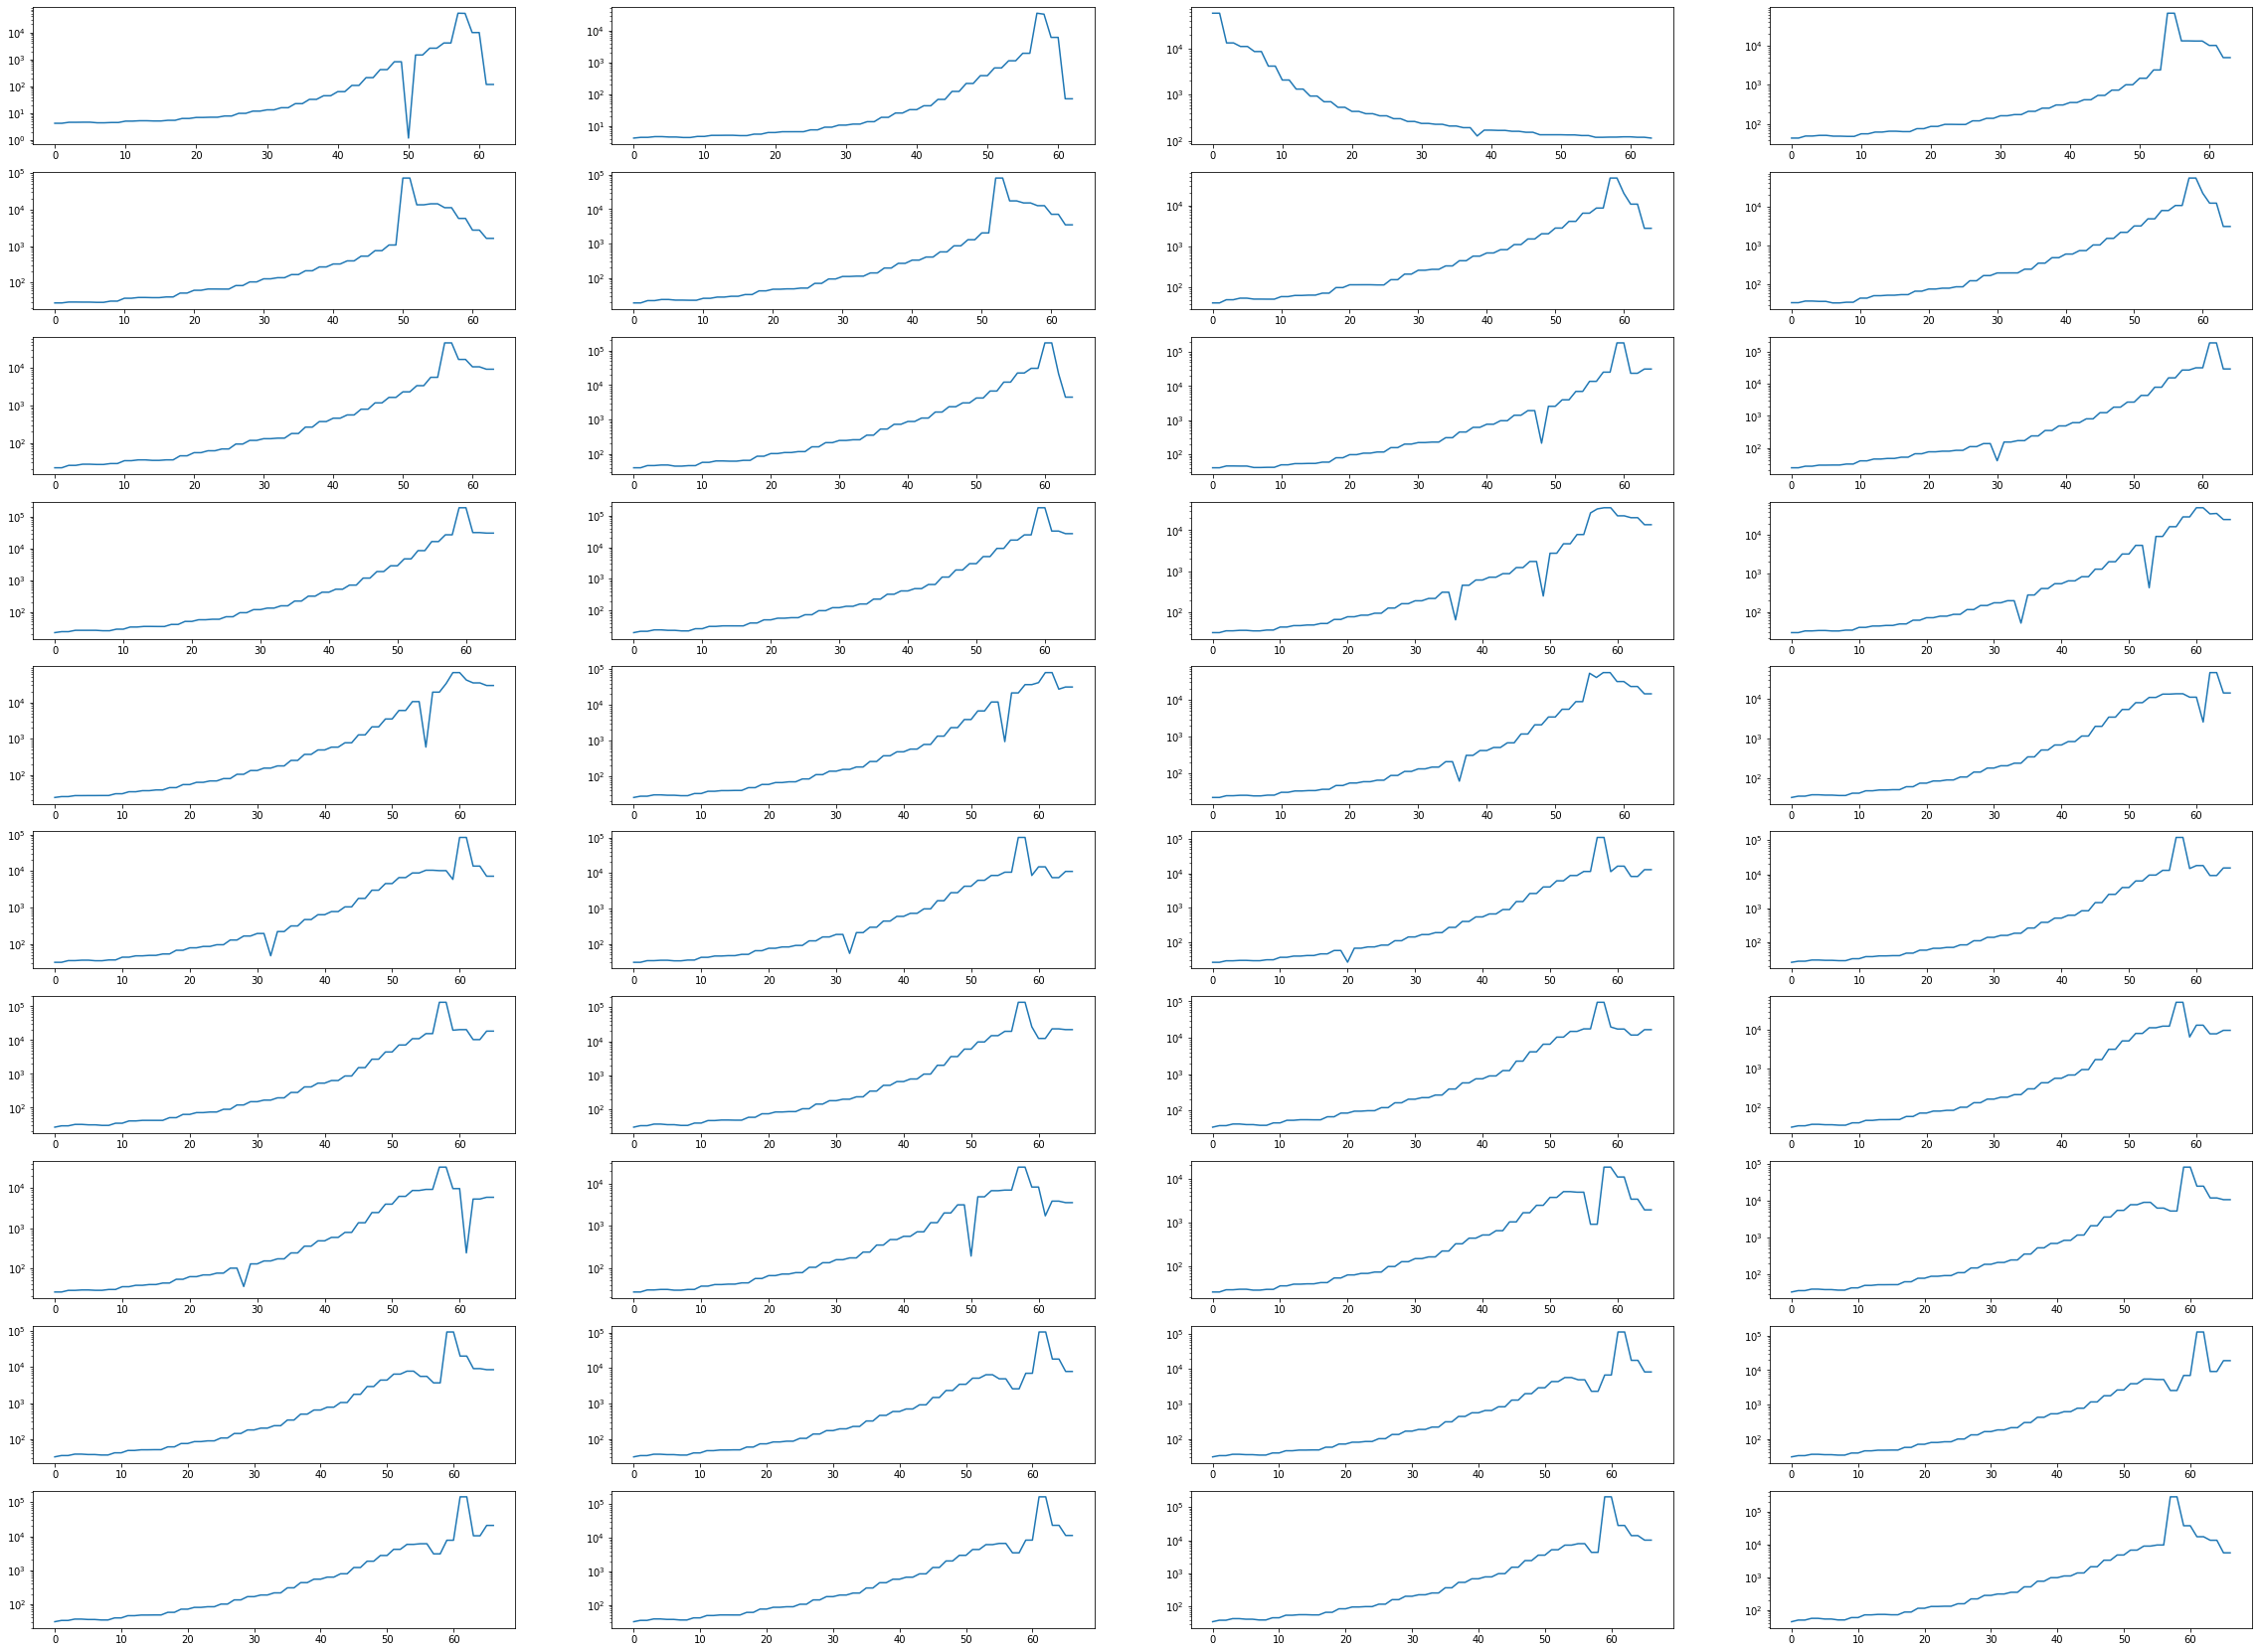

In [120]:
####################################################################################################################################
#           BEZ WEIGHTS
####################################################################################################################################


#dodajem 1
koliko_predvidam=10

#moram opet def jer ih gore promijenim u kodu
poc=400; zav=500

koliko_x=10; koliko_y=4
fig, axs = plt.subplots(koliko_x, koliko_y, figsize=(40,30), squeeze=True)

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav], tol=1e-6)

threshold=1e-2
indices = np.where(r < threshold)[0]
times=[i for i in range(zav-poc+koliko_predvidam)]
predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)

axs[0,0].plot(1/r)
axs[0,0].set_yscale('log')

br=0
for i in range(koliko_x):
    for j in range(koliko_y):
        if(i==0 and j==0):
            continue
        poc=poc+1; zav=zav+1
        if(zav-poc>60):
            _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R, tol=1e-6)
        
        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, tol=1e-6)

        indices=np.where(r < threshold)[0]
        print(indices.shape)


        predicted = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
        
        axs[i,j].plot(1/r)
        axs[i,j].set_yscale('log')
        #threshold=1/50
    #ako norma res < 1e-1 npr. odsječi sve osim zadnjih k
    # ovo jako lose radi... zasto...
        """if res > 0.5:
            poc=zav-30
            threshold = 1"""


Fixed window 

In [150]:
####################################################################################################################################
#           FIXED WINDOW
####################################################################################################################################


#dodajem 1
koliko_predvidam=1

poc=0; zav=100

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav], tol=1e-6)  ######################## Bilo je potrebno smanjiti tolerance (za odredivanje numerickog ranga) - sad vise nema ni linalg error u solve:)

threshold=1e-2
#threshold=1
print("ukupan moguci broj indeksa",r.shape)
indices = np.where(r < threshold)[0]
print(indices.shape)
times=[zav]
predicted=np.empty(vdp[:,100:].shape)
predicted[:,0]=DMD_reconstruction(vdp[:,poc:zav-1], Z, indices, L, times).reshape(-1)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)

all_res = []

for i in range(1,vdp.shape[1]-101):
        zav=zav+1
        poc=poc+1
        _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R, tol=1e-6)

        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, tol=1e-6, ngram=5)

        indices=np.where(r < threshold)[0]
        if(i%40==0):
            print(indices.shape)

        predicted[:,i] = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times).reshape(-1)

        res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
        all_res+=[res]

        #threshold=1e-2
    #ako norma res < 1e-1 npr. odsječi sve osim zadnjih k
    # ovo jako lose radi... zasto...
        """ if res > 0.5 and zav-poc>50:
            poc=zav-30
            threshold = 1e-1"""


### sada je i brze nego kad smo imali bez reortogonalizacije jer je tamo bilo puno ill-cond matrica, cesto se za solve radila nova instanca...

ukupan moguci broj indeksa (23,)
(5,)
(6,)
(20,)
(20,)
(5,)
(6,)
(5,)
(6,)
(7,)


c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=4.39002e-19): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.93822e-20): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=8.62022e-29): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=9.10821e-18): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.64877e-17): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\minic

(8,)
(20,)
(46,)
(15,)
(10,)
(10,)
(7,)
(5,)
(5,)
(8,)
(9,)
(8,)
(11,)
(15,)
(37,)
(20,)
(6,)
(4,)
(7,)
(11,)
(14,)
(18,)
(8,)
(6,)
(4,)
(8,)
(5,)
(6,)
(8,)
(8,)
(15,)
(7,)
(7,)
(7,)
(7,)
(6,)
(6,)


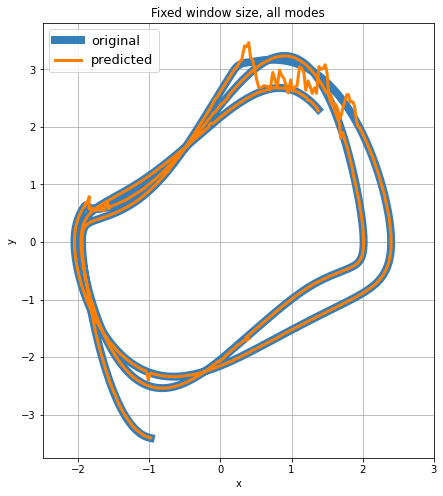

In [152]:
%matplotlib inline

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

plt.figure(figsize=(7,8))
plt.plot(vdp[-2,100:-60], vdp[-1,100:-60],lw=8, label=f"original", color=CB_color_cycle[0])
plt.plot(predicted[-2,:-60], predicted[-1,:-60], label=f"predicted", color=CB_color_cycle[1], lw=3)

#plt.plot(vdp[-2,100:300], vdp[-1,100:300],lw=4, label=f"original")
#plt.plot(predicted_H[-2,:200], predicted_H[-1,:200], label=f"predicted", color="red")

    
plt.title("Fixed window size, selected modes")
plt.xlabel("x")
plt.xlim((-2.5,3));plt.ylim=((-4,4))
#plt.xlim((-2.3,-1))  #- za manji
plt.ylabel("y")
plt.legend(fontsize=13, loc='upper left')
plt.grid()
plt.show()

fixed window, all modes - kada trenuci promjene mu - uzima više DMD vektora za rekonstrukciju. Inače uzme do 10 u većini slučajeva, a u tim slučajevima od 20-40 

In [153]:
np.where(np.array(all_res)>3)[0]

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,  340,  341,  342,  343,  344,  345,
        346,  347,  348,  349,  350,  351,  352,  353,  354,  355,  356,
        357,  358,  359,  360,  361,  362,  363,  364,  365,  366,  367,
        368,  369,  370,  371,  372,  373,  374,  375,  376,  377,  378,
        379,  380,  381,  382,  383,  384,  385,  386,  387,  388,  389,
        390, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061,
       1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072,
       1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083,
       1084, 1085], dtype=int64)

### window dmd

In [158]:
####################################################################################################################################
#           CHANGING WINDOW
####################################################################################################################################


#dodajem 1
koliko_predvidam=1

poc=0; zav=100

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav], tol=1e-6)  ######################## Bilo je potrebno smanjiti tolerance (za odredivanje numerickog ranga) - sad vise nema ni linalg error u solve:)

threshold=1e-2
#threshold=1
indices = np.where(r < threshold)[0]
times=[zav-poc]
predicted=np.empty(vdp[:,100:].shape)
predicted[:,0]=DMD_reconstruction(vdp[:,poc:zav-1], Z, indices, L, times).reshape(-1)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)


br=0; thresh_res=3; leave=40
for i in range(1,vdp.shape[1]-100):
        zav=zav+1
        if(zav-poc>=100):
            poc=poc+1
            _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R, tol=1e-6)

        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, tol=1e-6, ngram=5)
        #print(np.allclose(Q@R, vdp[:,poc:zav])) - jako dobra procjena 

        times = [zav-poc]  ################################################## 

        indices=np.where(r < threshold)[0]
        ##donji if-else 
        """if(zav-poc>=100):
                indices=np.where(r < threshold)[0]
        else:
               indices=np.where(r<max(np.mean(r), threshold))[0] #bolje nego da se stavi r<threshold..."""
        #print(indices.shape)

        predicted[:,i] = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times).reshape(-1)

        res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
        
        if(res>thresh_res):
                br+=1
        else:
                br=0 #ili br = max(br-1, 0)
        if(br>20 and zav-poc>50): #20 puta za redom imali veliku gresku - rezemo (i ako smo "napunili malo podatke")
            _,_,_,Q,R,_ = DMD_discarding_snap(zav-leave-poc, Q, R, tol=1e-6)
            poc=zav-leave  #smanjili window na duljinu leave ############################################## mozda nesto drugo bolje?   ### treba li smanjiti threshold
            br=0
            #thresh_res = 1.5
            print(i)
            print(poc, zav)

#brze se "ispravi" nego bez smanjenja windowa

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=4.39002e-19): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.93822e-20): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=8.62022e-29): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=9.10821e-18): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.64877e-17): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\minic

361
421 461
382
442 482
1073
1133 1173


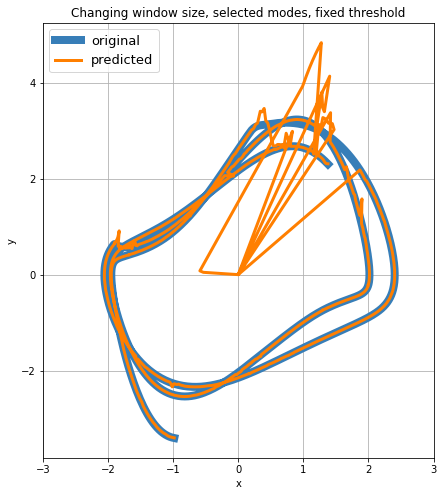

In [161]:
%matplotlib inline
plt.figure(figsize=(7,8))
plt.plot(vdp[-2,100:-60], vdp[-1,100:-60],lw=8, label=f"original", color=CB_color_cycle[0])
plt.plot(predicted[-2,:-60], predicted[-1,:-60], lw=3, label=f"predicted", color=CB_color_cycle[1])

#plt.plot(vdp[-2,100:300], vdp[-1,100:300],lw=4, label=f"original")
#plt.plot(predicted_H[-2,:200], predicted_H[-1,:200], label=f"predicted", color="red")

    
plt.title("Changing window size, selected modes, fixed threshold")
plt.xlabel("x")
plt.xlim((-3,3)); plt.ylim=((-4,4))
#plt.xlim((-2.3,-1))  - za manji
plt.ylabel("y")
plt.legend(fontsize=13, loc='upper left')
plt.grid()
plt.show()

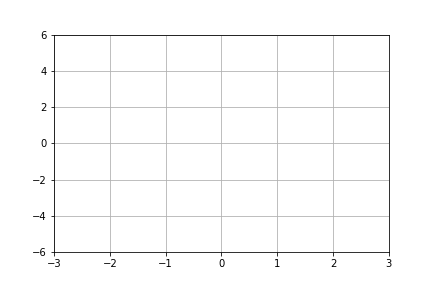

In [144]:
##############################################################################################################################
#############           windowed DMD  - dinamicki prikaz
##############################################################################################################################

%matplotlib widget
fig, ax = plt.subplots()

line2 = ax.plot(vdp[-2,99], vdp[-1,99], lw=4, color="blue")[0]
line1 = ax.plot(predicted[-2,0], predicted[-1,0], lw=2, color="red")[0]
ax.set_xbound(-3,3); ax.set_ybound(-6,6)
plt.grid()

def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[-2,100:(100+frame)]
    y = vdp[-1,100:(100+frame)]
    x_r = predicted[-2,:frame]
    y_r = predicted[-1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    line1.set_xdata(x_r)
    line1.set_ydata(y_r)
    #legend.get_texts()[0].set_text(f'time={frame}, res={res}')
    return (line2, line1)


ani = animation.FuncAnimation(fig=fig, func=update, frames=vdp.shape[1], interval=30, blit=True, repeat=False)
plt.show()